<a href="https://colab.research.google.com/github/Dhenielc15/CCMACLRL_PROJECT_COM221/blob/main/Multi_Class_Prediction_of_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Notebook Setup**

Import Libraries and Load Data

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load datasets
dataset_url = 'https://github.com/Dhenielc15/CCMACLRL_PROJECT_COM221/blob/main/train.csv?raw=true'
df = pd.read_csv(dataset_url)
test_url = 'https://github.com/Dhenielc15/CCMACLRL_PROJECT_COM221/blob/main/test.csv?raw=true'
dt = pd.read_csv(test_url)
sample_submission_url = 'https://github.com/Dhenielc15/CCMACLRL_PROJECT_COM221/blob/main/sample_submission.csv?raw=true'
sf = pd.read_csv(sample_submission_url)

# View first few rows
df.head()
df.info()
dt.info()
sf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**2. Data Preprocessing and Splitting**

Preprocessing Function and Data Preparation

In [16]:
# Define preprocessing function
def preprocess_data(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in categorical_columns:
        data[col] = le.fit_transform(data[col].astype(str))
    return data

# Preprocess training and test data
df_processed = preprocess_data(df)
dt_processed = preprocess_data(dt)

# Separate features and target
X = df_processed.drop(['id', 'NObeyesdad'], axis=1)
y = df_processed['NObeyesdad']

# Split the data into training and testing sets # This line was missing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**3. Decision Tree Classifier**

Decision Tree Model Training and Evaluation

Decision Tree Classifier Results:
Test set score: 0.8463391136801541
Cross-validation scores: [0.83684527 0.85275519 0.83288166 0.83830172 0.85215297]
Mean cross-validation score: 0.8425873625249064

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       524
           1       0.79      0.78      0.78       626
           2       0.83      0.83      0.83       543
           3       0.96      0.96      0.96       657
           4       0.99      1.00      0.99       804
           5       0.64      0.65      0.65       484
           6       0.71      0.72      0.72       514

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152



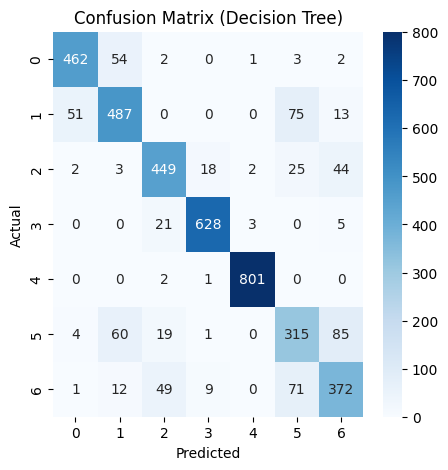

In [17]:
# Initialize and train Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)

# Evaluate on the test set
dtc_score = dtc.score(X_test_scaled, y_test)
cv_scores_dtc = cross_val_score(dtc, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Decision Tree Classifier Results:")
print(f"Test set score: {dtc_score}")
print(f"Cross-validation scores: {cv_scores_dtc}")
print(f"Mean cross-validation score: {cv_scores_dtc.mean()}")

# Detailed Classification Report
y_pred_dtc = dtc.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))

# Confusion Matrix
plt.figure(figsize=(5, 5))
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Decision Tree Classifier AUC Score: 0.9025991577810765


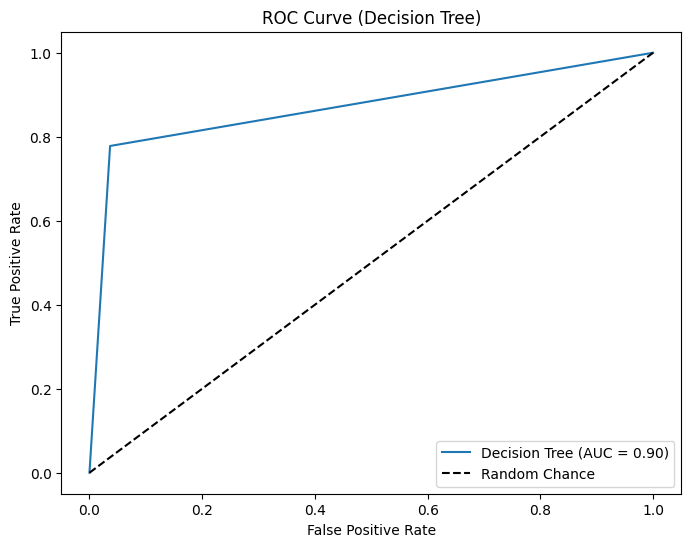

In [18]:
# Calculate probabilities for all classes
y_prob_dtc = dtc.predict_proba(X_test_scaled)

# Select probabilities for a specific class (e.g., class 1)
y_prob_dtc_class1 = y_prob_dtc[:, 1]  # Assuming class 1 is the positive class

# Calculate AUC score using 'ovr' method for multi-class
auc_dtc = roc_auc_score(y_test, y_prob_dtc, multi_class='ovr')
print(f"\nDecision Tree Classifier AUC Score: {auc_dtc}")

# ROC Curve for Decision Tree
# Use the probabilities for the selected class
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc_class1, pos_label=dtc.classes_[1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

**4. Random Forest Classifier**

Random Forest Model Training and Evaluation


Random Forest Classifier Results:
Test set score: 0.8959537572254336
Cross-validation scores: [0.89313666 0.899729   0.89220114 0.89822343 0.90936465]
Mean cross-validation score: 0.8985309764128478

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       524
           1       0.84      0.88      0.86       626
           2       0.88      0.86      0.87       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.78      0.75      0.77       484
           6       0.78      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.88      0.88      4152
weighted avg       0.90      0.90      0.90      4152



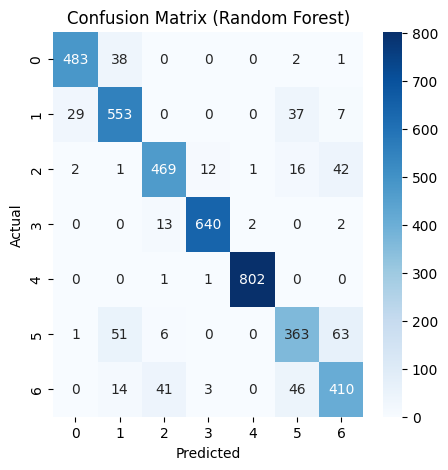

In [19]:
# Initialize and train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

# Evaluate on the test set
rfc_score = rfc.score(X_test_scaled, y_test)
cv_scores_rfc = cross_val_score(rfc, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("\nRandom Forest Classifier Results:")
print(f"Test set score: {rfc_score}")
print(f"Cross-validation scores: {cv_scores_rfc}")
print(f"Mean cross-validation score: {cv_scores_rfc.mean()}")

# Detailed Classification Report
y_pred_rfc = rfc.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

# Confusion Matrix
plt.figure(figsize=(5, 5))
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Random Forest Classifier AUC Score: 0.9863256766590359


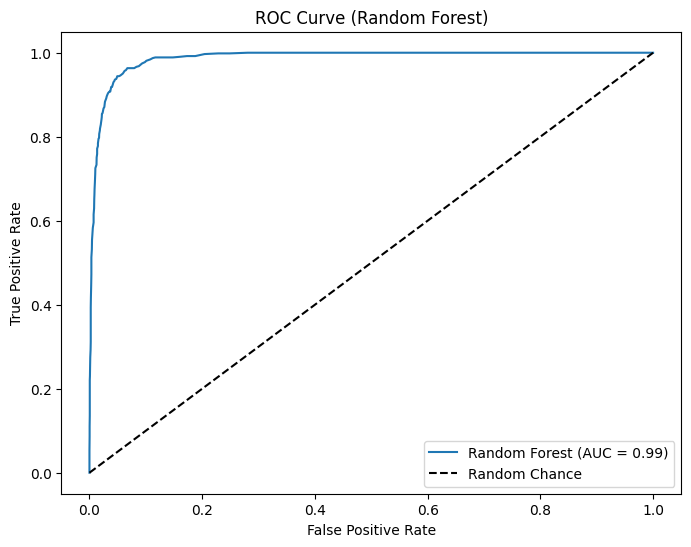

In [20]:
# Calculate probabilities for all classes
y_prob_rfc = rfc.predict_proba(X_test_scaled)

# Calculate AUC score using 'ovr' method for multi-class
auc_rfc = roc_auc_score(y_test, y_prob_rfc, multi_class='ovr')
print(f"\nRandom Forest Classifier AUC Score: {auc_rfc}")

# ROC Curve for Random Forest
# Use probabilities for the desired class (adjust index if needed)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc[:, 1], pos_label=rfc.classes_[1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

**5. Model Comparison and Visualization**

Comparing Accuracy, Precision, Recall, and F1 Score


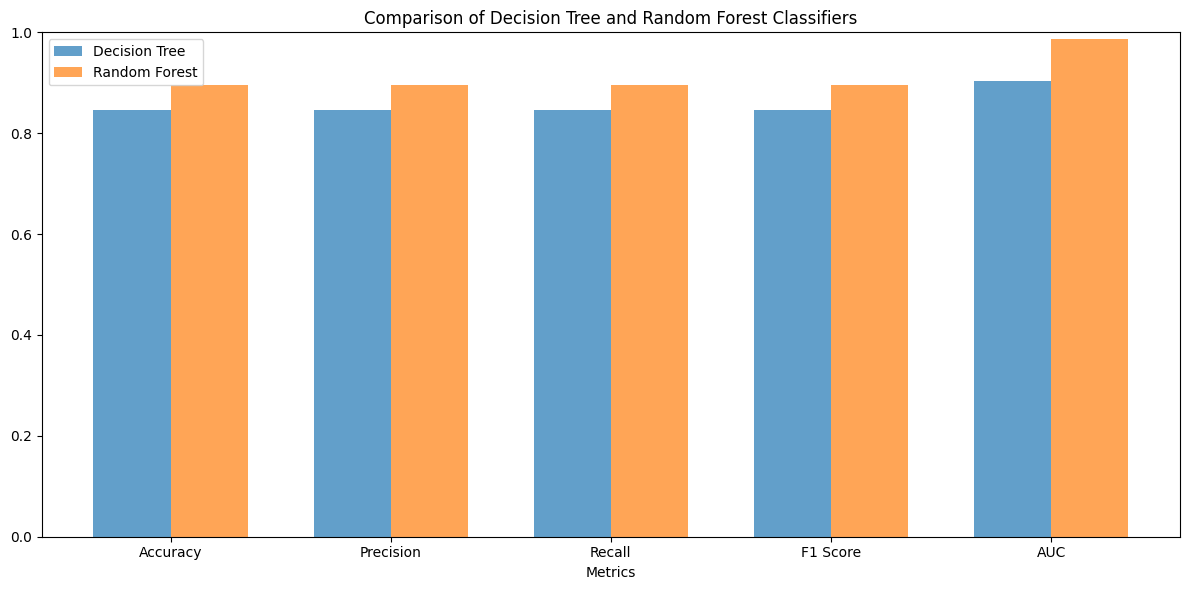

In [21]:
# Metrics for Decision Tree Classifier
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted')
recall_dtc = recall_score(y_test, y_pred_dtc, average='weighted')
f1_dtc = f1_score(y_test, y_pred_dtc, average='weighted')

# Metrics for Random Forest Classifier
precision_rfc = precision_score(y_test, y_pred_rfc, average='weighted')
recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')
f1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')

# Bar chart for additional metrics comparison
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
dtc_metrics = [dtc_score, precision_dtc, recall_dtc, f1_dtc, auc_dtc]
rfc_metrics = [rfc_score, precision_rfc, recall_rfc, f1_rfc, auc_rfc]

x = np.arange(len(metrics_labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(12, 6))

# Bar charts for DTC and RFC metrics
plt.bar(x - width/2, dtc_metrics, width, label='Decision Tree', alpha=0.7)
plt.bar(x + width/2, rfc_metrics, width, label='Random Forest', alpha=0.7)

# Adding labels and title
plt.xlabel('Metrics')
plt.title('Comparison of Decision Tree and Random Forest Classifiers')
plt.xticks(x, metrics_labels)
plt.legend()
plt.ylim(0, 1)  # Set y-axis limit

plt.tight_layout()
plt.show()


**6. Submission File Preparation**

Prepare Submission for Test Set Predictions

Submission file saved as 'obesity_risk_submission.csv'


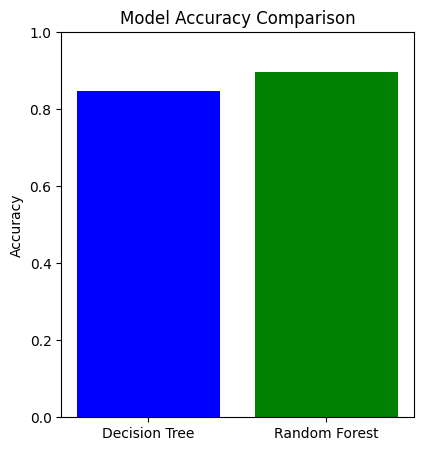

In [27]:

# Visualization of Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Decision Tree', 'Random Forest'], [dtc_score, rfc_score], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Scale test data
X_test_final = dt_processed
# Remove 'id' column before scaling
X_test_final_scaled = scaler.transform(X_test_final.drop(columns=['id']))

# Predict using the best model (Random Forest)
# Remove 'id' column before prediction as well
test_predictions = rfc.predict(X_test_final_scaled)

# Create submission file
submission_df = sf.copy()
submission_df['NObeyesdad'] = test_predictions
submission_df.to_csv('obesity_risk_submission.csv', index=False)
print("Submission file saved as 'obesity_risk_submission.csv'")
